In [1]:
from plots import *
from functions_ml import *
from dtreeviz.trees import *

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


INFO: Pandarallel will run on 48 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


In [2]:
predictionID = '0391'
config_path = f'../configs_ml/ml_run.{predictionID}.config'
target, sliding, algorithm, drop_zeros, drop_outliers, do_sliding_feature_selection, feats, some_top_xs, \
how_many_some_top_xs, in_sample, z_score, y_scaling, prediction_id_initialize, resampling, \
cv, extras1, extras2, parameters, stocks, strategy, normalization, mirrored, \
time_sampling, outlier_method, multi_test,  absolute_features, times_sign_of_target_features, sample, lagged_target = read_config(config_path)

path = '/mnt/extrahd/DATA/fromChrisAll/'
folder = os.listdir(path)
folder = np.sort(folder).tolist()
folder = [d for d in folder if d.isdigit()]

if sample == '1':
    folder = [d for d in folder if int(d) <= 20191101]
elif sample == '2':
    folder = [d for d in folder if 20200917 <= int(d) <= 20201230]
elif sample == '3':
    folder = [d for d in folder if int(d) <= 20210310]
previous_test_dates = []

Prediction ID: 0391
--------------------Config was successfully read--------------------
target: r1p3
sliding: 10
algorithm: lgb
drop_zeros: True
drop_outliers: True
do_sliding_feature_selection: no
feats: 1000
some_top_xs: ['mst', 'x1p52', 'x2p4', 'x2p4Ind', 'x5p4']
how_many_some_top_xs: 1
in_sample: True
z_score: std
y_scaling: True
prediction_id_initialize: 0391
resampling: full_tick
cv: no_cv
extras1: ''
extras2: ''
parameters: eval_metric=pearson,early_stopping_rounds=50,num_leaves=10,min_child_samples=20,max_depth=2,learning_rate=0.1,boosting_type=gbdt,verbosity=-1,subsample=0.8,objective=regression,random_state=0
stocks: ['ABCB4', 'ABEV3', 'ALPA4', 'ALSC3', 'ALSO3', 'ALUP11', 'AMAR3', 'ARZZ3', 'AZUL4', 'B3SA3', 'BBAS3', 'BBDC3', 'BBDC4', 'BBSE3', 'BEEF3', 'BIDI11', 'BIDI4', 'BKBR3', 'BMGB11', 'BPAC11', 'BPAN4', 'BRAP4', 'BRDT3', 'BRFS3', 'BRKM5', 'BRML3', 'BRPR3', 'BRSR6', 'BTOW3', 'CAML3', 'CCRO3', 'CEAB3', 'CESP6', 'CIEL3', 'CMIG3', 'CMIG4', 'CNTO3', 'COGN3', 'CPFE3', 'CPLE3',

## In Sample - Out Of Sample for a date and its 10 previous days

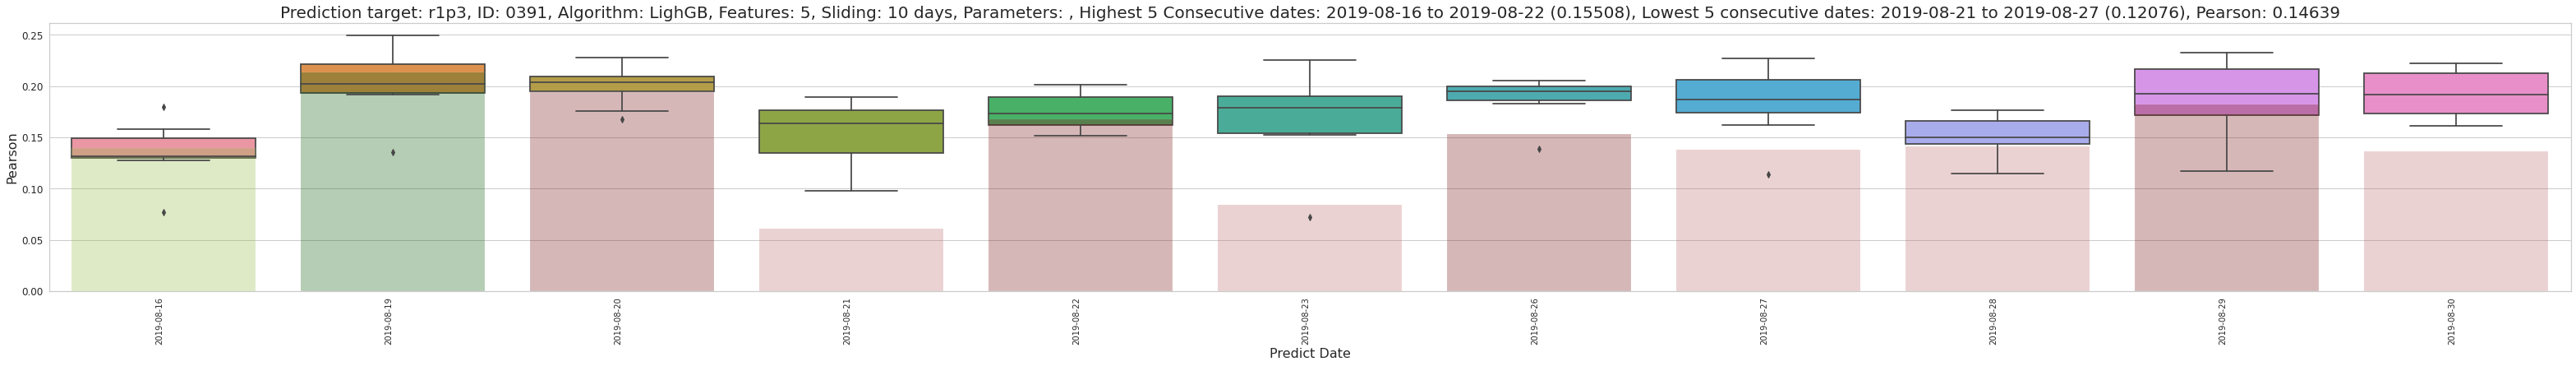

In [3]:
stock = 'PETR4'
date = 20190830
inSampleAndOutOfSampleAllDays(target, stock, predictionID, target_date=date)

## Read Data for this date and compute predictions

In [4]:
data = pd.DataFrame()
data, cols_to_exclude, cols_with_x, unique_dates_number, test_dates = read_data3(folder, folder.index(str(date)), 0, data, stock, some_top_xs, path, multi_test, target)

Unique Dates Arleady: []
dates_to_be_used_for_this_iteration ['20190830']
20190830
Data Reading Time = 2.069


In [5]:
code = open(f'/home/effro/Projects/Project_9/savedModels/{predictionID}/{date}/{date}.modelPython.trade.{predictionID}.{stock}_BOVESPA.txt', 'r')
code = code.read()
exec(code)
coeffs = pd.read_csv(f'/home/effro/Projects/Project_9/savedModels/{predictionID}/{date}/{date}.model.stats.trade.{predictionID}.{stock}_BOVESPA.csv')
data['prediction'] = data.parallel_apply(lambda x: score([(x[f]-coeffs['signalMean'][i+2])/coeffs['signalStdev'][i+2] for i, f in enumerate(coeffs['signalName'][2:].values)]), axis=1)
data_with_preds = data.dropna()

In [6]:
data_with_preds

,date,exchangeTime,mst,x1p52,x2p4,x2p4Ind,x5p4,bidPrice1,askPrice1,r1p3,prediction
5529,20190830,101500140.883032,0.000028,0.233500,-0.000863,5.165752,0.000191,25.450000,25.460000,-2.002786,0.011151
5530,20190830,101500157.067883,0.000028,0.233500,0.002202,5.165752,0.000191,25.450000,25.460000,-2.003715,0.011151
5531,20190830,101500164.540916,0.000027,0.233500,-0.000864,5.165752,0.000191,25.450000,25.460000,-2.003578,0.011151
5532,20190830,101500471.100351,0.000018,0.233500,-0.014087,4.969071,0.000191,25.450000,25.460000,-2.003578,0.011151
5533,20190830,101500638.012217,0.000024,0.233500,0.032224,7.532167,0.000191,25.450000,25.460000,-2.003578,0.011151
...,...,...,...,...,...,...,...,...,...,...,...
334083,20190830,164958381.461807,0.000012,1.162889,1.961821,0.471385,0.015261,25.410000,25.430000,0.000000,0.011151
334084,20190830,164958895.686980,0.000011,1.162889,1.835125,0.452158,0.015261,25.410000,25.430000,0.000000,0.011151
334085,20190830,164959527.267655,0.000011,1.162889,1.721135,-0.543679,0.012486,25.410000,25.430000,0.000000,0.011151
334086,20190830,164959685.728052,0.000011,1.162889,1.692906,-0.527155,0.012486,25.410000,25.430000,0.000000,0.011151


### Unique Prediction Values

In [8]:
print(f"Date {date} for ID-{predictionID} has {data_with_preds['prediction'].nunique()} unique prediction values.")

Date 20190830 for ID-0391 has 9 unique prediction values.


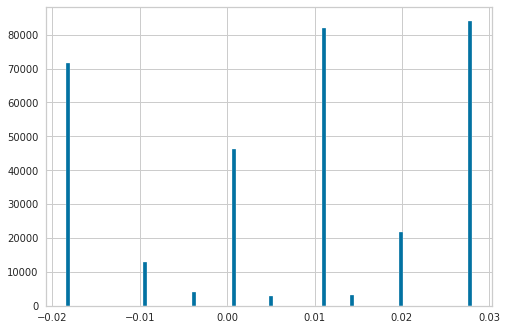

In [9]:
plt.hist(data_with_preds['prediction'], bins=100);

### Read 10 days before and 1 day (current)

In [4]:
data = pd.DataFrame()
data, cols_to_exclude, cols_with_x, unique_dates_number, test_dates = read_data3(folder, folder.index(str(date))-10, 9, data, stock, some_top_xs, path, multi_test, target)

dates_to_be_used_for_this_iteration ['20190816', '20190819', '20190820', '20190821', '20190822', '20190823', '20190826', '20190827', '20190828', '20190829']
20190816
20190819
20190820
20190821
20190822
20190823
20190826
20190827
20190828
20190829
Data Reading Time = 48.149


In [66]:
data_specific = pd.DataFrame()
data_specific, cols_to_exclude, cols_with_x, unique_dates_number, test_dates = read_data3(folder, folder.index(str(date)), 0, data, stock, some_top_xs, path, multi_test, target)

dates_to_be_used_for_this_iteration ['20190830']
20190830
Data Reading Time = 2.487


### Distribution Comparisons for all features and target between 10 previous days and test day

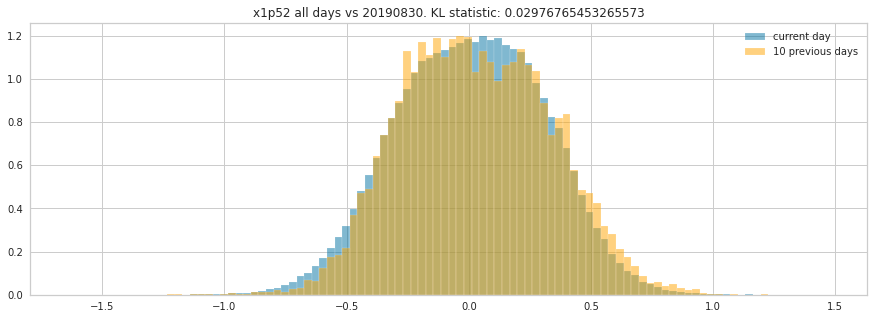

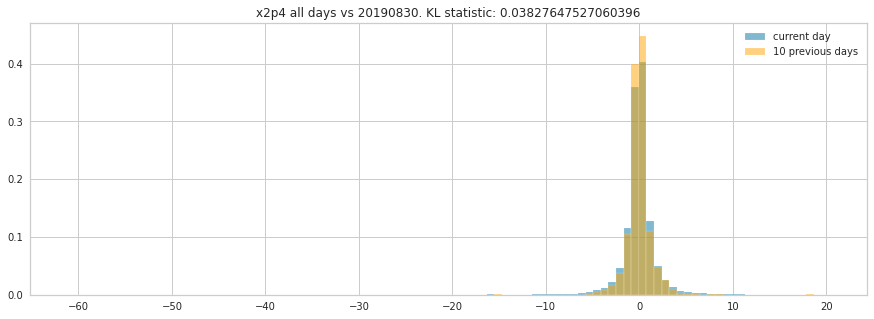

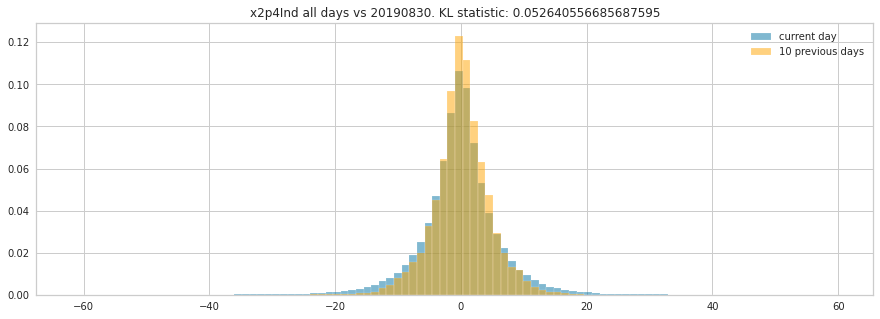

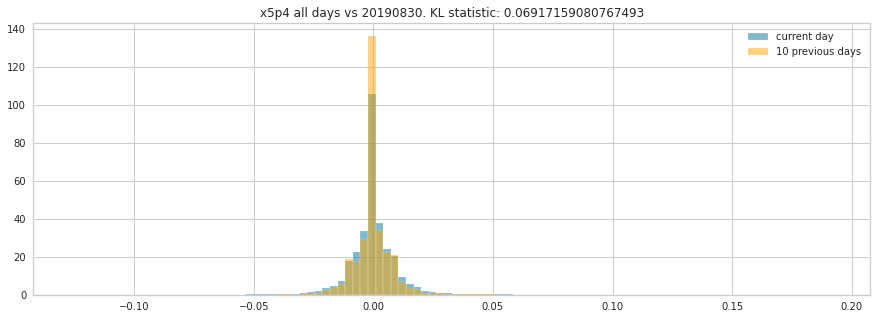

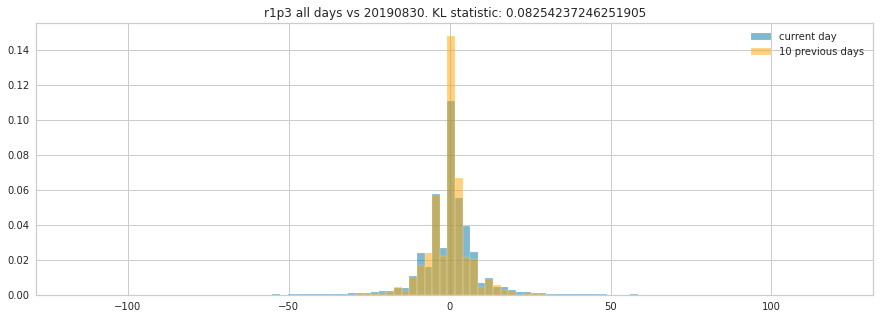

In [72]:
density = True
bins = 100
feature = 'r1p3' # Feature or Target name here
for feature in ['x1p52', 'x2p4', 'x2p4Ind', 'x5p4', 'r1p3']:
    temp = [data[feature].min(), data[feature].max(), data_specific[feature].min(), data_specific[feature].max()]
    x_min = min(temp)
    x_max = max(temp)
    del temp

    fig, ax = plt.subplots(figsize=(15, 5))
    y_data, x_data, _  = plt.hist(x=data[feature], bins=100, density=True, alpha = 0.5, range=[x_min,x_max], label='current day'
            )
    y_specific, x_specific, _  = plt.hist(x=data_specific[feature], bins=100, density=True, alpha = 0.5, color='orange', range=[x_min,x_max], label='10 previous days',
        )
    ax.legend()
    plt.title(f"{feature} all days vs {date}. KL statistic: {stats.ks_2samp(data[feature], data_specific[feature])[0]}");

## Train Model

In [7]:
stock = 'PETR4'
date = 20190830

data = pd.DataFrame()
data, cols_to_exclude, cols_with_x, unique_dates_number, test_dates = read_data3(folder, folder.index(str(date))-10, 10, data, stock, some_top_xs, path, multi_test, target)

data = feature_transformation(data, some_top_xs, target, absolute_features, times_sign_of_target_features)
data = add_lagged_features(data, target, lagged_target)

dates_sorted = data['date'].unique().tolist()
print(f"Train: {dates_sorted[0]} - {dates_sorted[-2]}, Test: {dates_sorted[-1]} ")
train = data.loc[data['date'].isin(dates_sorted[:-1])]
test = data.loc[data['date'] == dates_sorted[-1]]

if target in ['fret', 'r1p3', 't2p4', 't5p4', 'tmst', 't1p52']:
    train = train.loc[train[target].abs() > 0.1]
# Initializations
ntrain, ntest, SEED, NFOLDS, kfolds_suffleFalse, kfolds_suffleTrue, kfolds_shuffleSplit, strfolds_suffleFalse, strfolds_suffleTrue, group_folds, leaveOneOut_groupfolds, \
randomPermutation_groupfolds, timeSeriesSplit, blockedTimeSeries, exchangeTime = initializations(train, test)

# Feature Selection
df_train_columns = get_features(stock, folder, date, sliding, target, data, train,
                                do_sliding_feature_selection, cols_to_exclude, cols_with_x,
                                some_top_xs, how_many_some_top_xs, feats)

# Set y_train, y_test, train, test
y_train = train[target].ravel()
train = train[df_train_columns]
y_test = test[target].ravel()
test = test[df_train_columns]

# Print feature number and names
features = len(df_train_columns)
feature_names = df_train_columns
print(f'Train rows: {train.shape[0]}, train cols: {len(df_train_columns)}, features: {df_train_columns} |', end=' ')

# Normalizations
scaler, y_scaler, x_train, x_test, y_train = normalize(z_score, algorithm, y_scaling, train, test, y_train)

x_train = x_train[np.where(np.abs(y_train) < np.quantile(np.abs(y_train), 0.99))[0]]
y_train = y_train[np.where(np.abs(y_train) < np.quantile(np.abs(y_train), 0.99))[0]]
x_train = x_train[np.where(np.abs(y_train) > np.quantile(np.abs(y_train), 0.00))[0]]
y_train = y_train[np.where(np.abs(y_train) > np.quantile(np.abs(y_train), 0.00))[0]]

prediction, model, coeffs, intercept, error = train_model_no_cv(y_scaler, x_train=x_train, x_test=x_test,
                                                                         y_test=y_test, y_train=y_train,
                                                                         parameters=parameters, model_type=algorithm)

Unique Dates Arleady: []
dates_to_be_used_for_this_iteration ['20190816', '20190819', '20190820', '20190821', '20190822', '20190823', '20190826', '20190827', '20190828', '20190829', '20190830']
20190816
20190819
20190820
20190821
20190822
20190823
20190826
20190827
20190828
20190829
20190830
Data Reading Time = 25.859
Train: 20190816 - 20190829, Test: 20190830 
Train rows: 3409548, train cols: 5, features: ['mst', 'x1p52', 'x2p4', 'x2p4Ind', 'x5p4'] | Normalization Time: 0.240 [1]	training's l2: 0.653043	training's Pearson: 0.111585	valid_1's l2: 36.8228	valid_1's Pearson: 0.133893
Training until validation scores don't improve for 50 rounds
[2]	training's l2: 0.651771	training's Pearson: 0.113317	valid_1's l2: 36.8097	valid_1's Pearson: 0.136152
[3]	training's l2: 0.650707	training's Pearson: 0.119442	valid_1's l2: 36.8001	valid_1's Pearson: 0.134704
[4]	training's l2: 0.649717	training's Pearson: 0.123066	valid_1's l2: 36.7928	valid_1's Pearson: 0.130863
[5]	training's l2: 0.648916	t

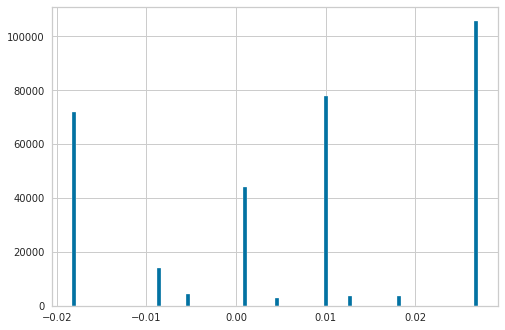

In [9]:
plt.hist(prediction, bins=100);

In [17]:
model.plot_tree()

AttributeError: 'LGBMRegressor' object has no attribute 'plot_tree'